### Data-driven optimization and decision making

### Final project

Juha Reinikainen

In [15]:
import matplotlib.pyplot as plt
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.factory import get_sampling, get_crossover, get_mutation
from pymoo.operators.mixed_variable_operator import MixedVariableSampling, MixedVariableMutation, MixedVariableCrossover
from pymoo.visualization.pcp import PCP
import numpy as np

import model
import data
import algorithm
import prediction

# import warnings
# warnings.simplefilter("ignore")

# reload changes to self written files
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
df, esg = data.get_data_df()

n_stocks = df.shape[1]
population_size = 200
n_generations = 2000
min_weight = 0.02 # 1/50
max_weight = 0.6
min_stocks = 6
max_stocks = 20
predictionPeriod = 12 # 3 * 4 = 12 weeks = 3 months

In [17]:
predictedPrices, mean_cv_scores = prediction.predictWithArima(df, predictionPeriod)

In [18]:
print("cross validation scores SMAPE")
for stock, score in zip(data.STOCKNAMES, mean_cv_scores):
    print(stock, score)

cross validation scores SMAPE
ADS.DE 8.178385746708626
ADYEN.AS 10.641090818052325
AD.AS 5.408601054821343
AI.PA 4.786506648996402
AIR.PA 11.846596331941681
ALV.DE 7.019777303513461
ABI.BR 9.809535329106653
ASML.AS 8.526407784730827
CS.PA 8.955262184806415
BAS.DE 7.996981181671698
BAYN.DE 8.671662640055118
BBVA.MC 11.018076694228448
SAN.MC 10.875880871596674
BMW.DE 8.921097861343082
BNP.PA 11.041334277715546
CRG.IR 7.355815124187261
BN.PA 5.411205090121721
DB1.DE 5.620575889394867
DPW.DE 8.566878522693125
DTE.DE 5.363621193290268
ENEL.MI 6.760362644618639
ENI.MI 8.772337667774167
EL.PA 6.815978917387625
FLTR.IR 10.613981495085303
RMS.PA 6.811196472577539
IBE.MC 6.152322262080069
ITX.MC 7.219939644782287
IFX.DE 11.013903240141746
INGA.AS 12.135879754372953
ISP.MI 9.915104274969671
KER.PA 8.717096271195077
KNEBV.HE 6.111059398376292
OR.PA 5.782518002224039
LIN.DE 6.220693243454447
MC.PA 7.2218918200092075
MBG.DE 11.535518384043854
MUV2.DE 7.50525191886549
RI.PA 5.10132777229795
PHIA.AS 7

In [19]:
variable_type_mask = ["real" for _ in range(n_stocks)] + ["bin" for _ in range(n_stocks)]

sampling = MixedVariableSampling(variable_type_mask, {
    "real": get_sampling("real_random"),
    "bin": get_sampling("bin_random")
})

crossover = MixedVariableCrossover(variable_type_mask, {
    "real": get_crossover("real_sbx", prob=1.0, eta=3.0),
    "bin": get_crossover("bin_two_point")
})

mutation = MixedVariableMutation(variable_type_mask, {
    "real": get_mutation("real_pm", eta=3.0, prob=1/50),
    "bin": get_mutation("bin_bitflip", prob=1/50)
})
# problem = model.PortfolioSelection(df, esg, min_weight, max_weight, min_stocks, max_stocks, n_stocks)

repairMethod = algorithm.OneSumRepair(min_weight, max_weight, n_stocks)

In [20]:
problem = \
    model.PortfolioSelection(df, predictedPrices, esg, min_weight, max_weight, 
                                min_stocks, max_stocks, n_stocks, predictionPeriod)

In [21]:
# initial_population = algorithm.createInitialPopulation(population_size, n_stocks)
nsga2 = NSGA2(
    pop_size = population_size, 
    sampling=sampling,
    crossover = crossover,
    mutation = mutation,
    repair = repairMethod
)
res = minimize(problem, nsga2, ("n_gen", n_generations), seed=1, verbose = True)

n_gen |  n_eval |   cv (min)   |   cv (avg)   |  n_nds  |     eps      |  indicator  
    1 |     200 |  0.00000E+00 |  5.090000000 |       7 |            - |            -
    2 |     400 |  0.00000E+00 |  1.570000000 |      15 |  0.154078259 |        ideal


c:\Users\Juha Reinikainen\Documents\dataopt\env\lib\site-packages\pymoo\operators\crossover\sbx.py:45: RuntimeWarning: invalid value encountered in power
  betaq[mask] = np.power((rand * alpha), (1.0 / (self.eta + 1.0)))[mask]


    3 |     600 |  0.00000E+00 |  0.165000000 |      18 |  0.178725880 |        ideal
    4 |     800 |  0.00000E+00 |  0.00000E+00 |      22 |  0.163298043 |        ideal
    5 |    1000 |  0.00000E+00 |  0.00000E+00 |      28 |  0.377523107 |        ideal
    6 |    1200 |  0.00000E+00 |  0.00000E+00 |      31 |  0.070282528 |        ideal
    7 |    1400 |  0.00000E+00 |  0.00000E+00 |      36 |  0.185231586 |        ideal
    8 |    1600 |  0.00000E+00 |  0.00000E+00 |      42 |  0.083702477 |        ideal
    9 |    1800 |  0.00000E+00 |  0.00000E+00 |      51 |  0.042504803 |        ideal
   10 |    2000 |  0.00000E+00 |  0.00000E+00 |      56 |  0.015004083 |        ideal
   11 |    2200 |  0.00000E+00 |  0.00000E+00 |      64 |  0.045194834 |        ideal
   12 |    2400 |  0.00000E+00 |  0.00000E+00 |      64 |  0.098737540 |        ideal
   13 |    2600 |  0.00000E+00 |  0.00000E+00 |      81 |  0.101359790 |        ideal
   14 |    2800 |  0.00000E+00 |  0.00000E+00 |      9

c:\Users\Juha Reinikainen\Documents\dataopt\env\lib\site-packages\pymoo\operators\mutation\pm.py:52: RuntimeWarning: invalid value encountered in power
  d = 1.0 - (np.power(val, mut_pow))


  114 |   22800 |  0.00000E+00 |  0.00000E+00 |     200 |  0.023930191 |        nadir
  115 |   23000 |  0.00000E+00 |  0.00000E+00 |     200 |  0.008727231 |            f
  116 |   23200 |  0.00000E+00 |  0.00000E+00 |     200 |  0.005279059 |        nadir
  117 |   23400 |  0.00000E+00 |  0.00000E+00 |     200 |  0.006198916 |            f
  118 |   23600 |  0.00000E+00 |  0.00000E+00 |     200 |  0.009395393 |            f
  119 |   23800 |  0.00000E+00 |  0.00000E+00 |     200 |  0.010322330 |            f
  120 |   24000 |  0.00000E+00 |  0.00000E+00 |     200 |  0.008554215 |            f
  121 |   24200 |  0.00000E+00 |  0.00000E+00 |     200 |  0.008218288 |            f
  122 |   24400 |  0.00000E+00 |  0.00000E+00 |     200 |  0.008738059 |            f
  123 |   24600 |  0.00000E+00 |  0.00000E+00 |     200 |  0.011676665 |        nadir
  124 |   24800 |  0.00000E+00 |  0.00000E+00 |     200 |  0.057312590 |        nadir
  125 |   25000 |  0.00000E+00 |  0.00000E+00 |     20

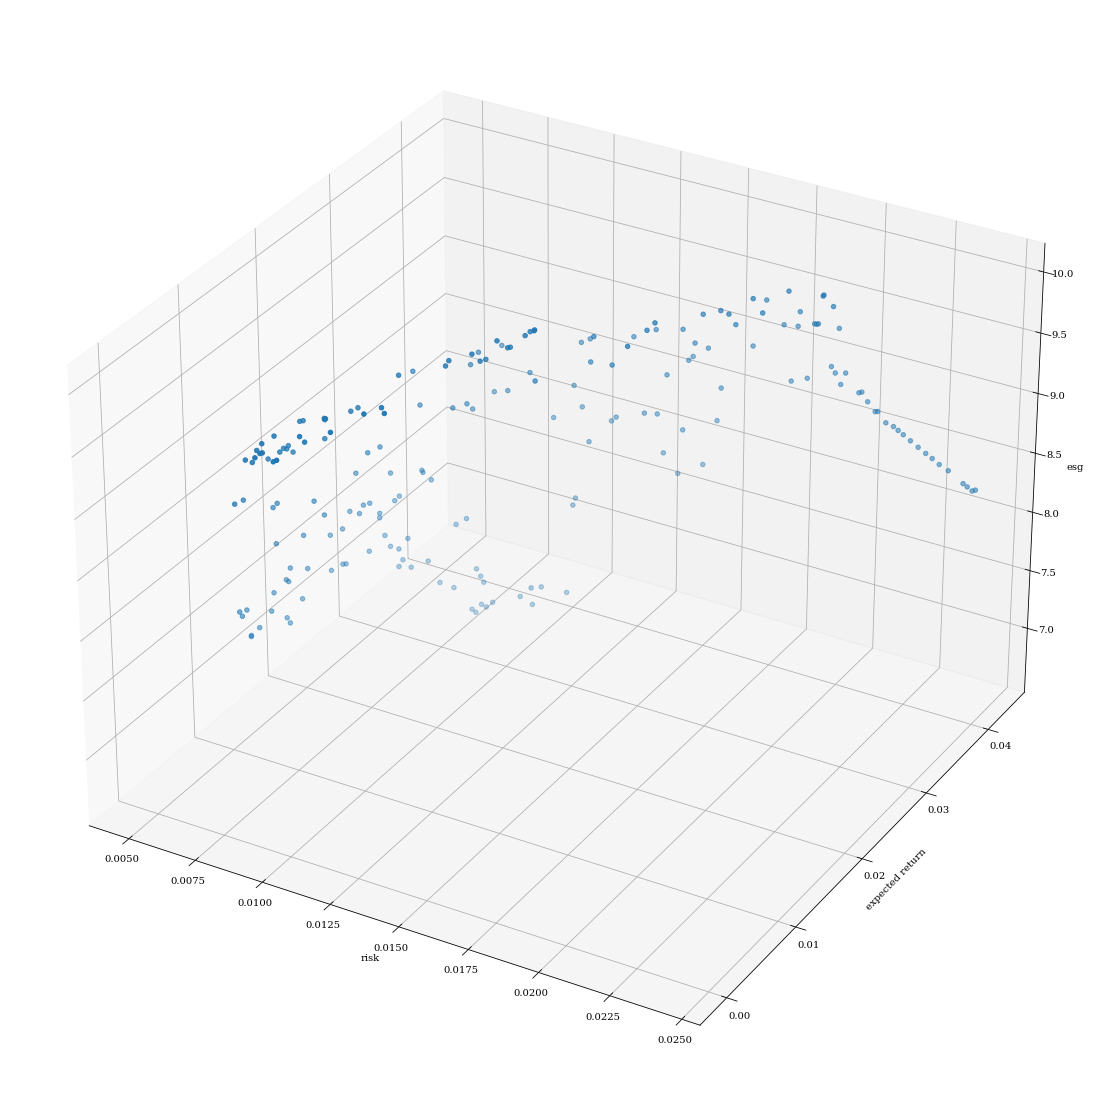

In [22]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(projection='3d')

ax.scatter(res.F[:,1], -res.F[:,0], -res.F[:,2])
ax.set_xlabel("risk")
ax.set_ylabel("expected return")
ax.set_zlabel("esg")
plt.show()

In [23]:
Wfinal = res.X[:,:n_stocks]
Yfinal = res.X[:,n_stocks:]
WYfinal = res.X[:,:n_stocks] * res.X[:, n_stocks:] 
#weights add to one?
sumOfWeights = WYfinal.sum(axis=1)
print(sumOfWeights.min(), sumOfWeights.max())

nStocksInEachSolution = Yfinal.sum(axis=1)
#number of stocks between min_stocks and max_stocks?
hasRightAmountOfStocks = \
    np.logical_and(nStocksInEachSolution >= min_stocks, nStocksInEachSolution <= max_stocks) 
print(set(hasRightAmountOfStocks))

0.9999999999999996 1.0000000000000004
{True}


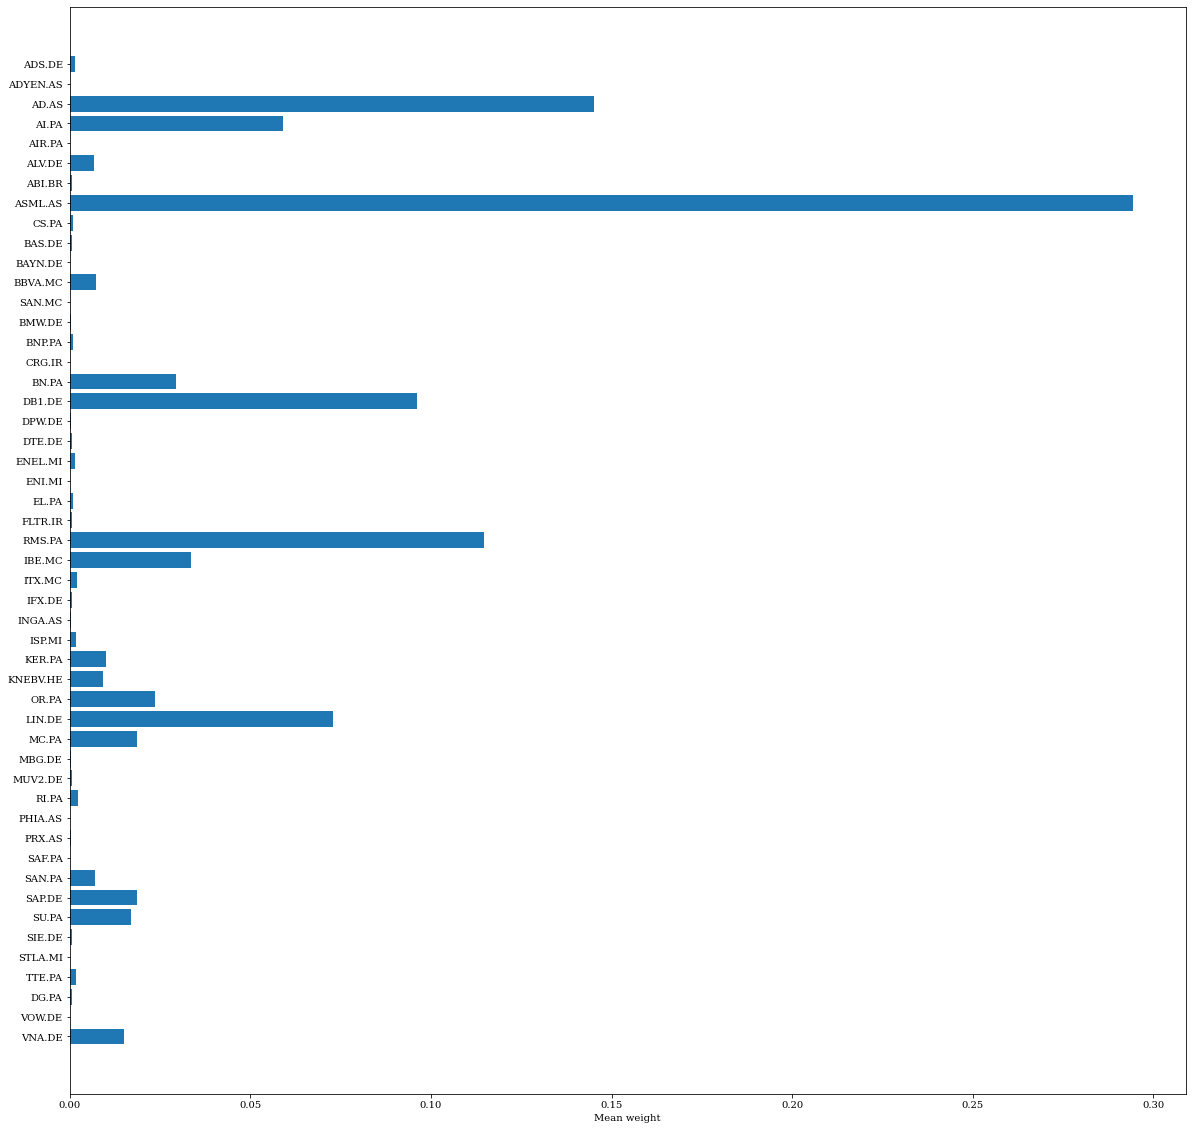

In [24]:
#mean weight for each stock
Wmean = WYfinal.mean(axis=0)
fig, ax = plt.subplots(figsize=(20,20))
ax.barh(range(len(Wmean)), Wmean)
ax.set_yticks(range(len(Wmean)), labels=data.STOCKNAMES)
ax.invert_yaxis()
ax.set_xlabel("Mean weight")

plt.show()

return -0.000607980357709915 0.04285433303021765
risk 0.004896957508760496 0.024217544349891967
esg 6.680942770608352 9.991483502603453
(200, 3)


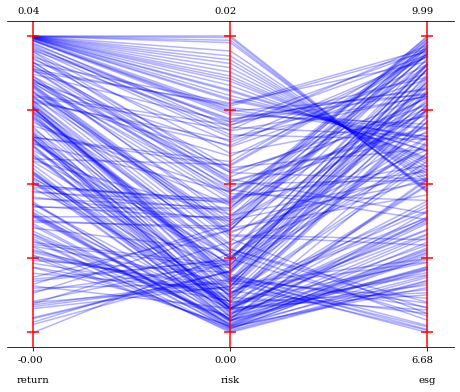

In [25]:
#ranges of objectives function values
print("return",(-res.F[:,0]).min(),(-res.F[:,0]).max())
print("risk",res.F[:,1].min(),res.F[:,1].max())
print("esg",(-res.F[:,2]).min(),(-res.F[:,2]).max())

#parallel coordinate plot
FPCP = np.array([-res.F[:,0], res.F[:,1], -res.F[:,2]]).T
print(FPCP.shape)
pcpPlot = PCP(labels=["return", "risk", "esg"])
pcpPlot.add(FPCP, color="blue", alpha=0.3)
# pcpPlot.add(FPCP[57], linewidth=5, color="red")
pcpPlot.show()

In [26]:
#save objective vectors for final solution selection in dm.ipynb
np.save("./data/F.npy", res.F)

In [29]:
portfolioWeights = WYfinal[154]
portfolioObjValues = FPCP[154]

In [30]:
print(portfolioWeights)
#filter out zero weights
sizeIs = [i for i in range(len(portfolioWeights)) if not np.isclose(portfolioWeights[i], 0.0)]
sizes = portfolioWeights[sizeIs]
names = np.array(data.STOCKNAMES)[sizeIs]
for weight,nameOfStock in zip(sizes, names):
    print(nameOfStock, weight)

print()
print("return",portfolioObjValues[0])
print("risk",portfolioObjValues[1])
print("ESG score",portfolioObjValues[2])
# _,plt.pie(sizes, labels = names, autopct='%1.1f%%')
# plt.show()

[0.0 0.0 0.36743445675956027 0.05499845430509741 0.0 0.0 0.0
 0.3767594251504457 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.07424752788753072 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.032351181508428625 0.019342825472794728 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.04408159613523184 0.0 0.0 0.01539226639045531 0.0 0.0
 0.01539226639045531]
AD.AS 0.36743445675956027
AI.PA 0.05499845430509741
ASML.AS 0.3767594251504457
RMS.PA 0.07424752788753072
LIN.DE 0.032351181508428625
MC.PA 0.019342825472794728
SU.PA 0.04408159613523184
TTE.PA 0.01539226639045531
VNA.DE 0.01539226639045531

return 0.031734757684738775
risk 0.009161305808268835
ESG score 8.67515405544134
